In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## CSV

In [2]:
df = pd.read_csv("Sales.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## JSON

In [3]:
df2 = pd.read_json("customers.json")
df2.head()

,id,email,first,last,company,created_at,country
0,1,isidro_von@hotmail.com,Torrey,Veum,"Hilll, Mayert and Wolf",2014-12-25 04:06:27.981000+00:00,Switzerland
1,2,frederique19@gmail.com,Micah,Sanford,Stokes-Reichel,2014-07-03 16:08:17.044000+00:00,Democratic People's Republic of Korea
2,3,fredy54@gmail.com,Hollis,Swift,"Rodriguez, Cartwright and Kuhn",2014-08-18 06:15:16.731000+00:00,Tunisia
3,4,braxton29@hotmail.com,Perry,Leffler,"Sipes, Feeney and Hansen",2014-07-10 11:31:40.235000+00:00,Chad
4,5,turner59@gmail.com,Janelle,Hagenes,Lesch and Daughters,2014-04-21 15:05:43.229000+00:00,Swaziland


## EXCEL

In [4]:
df3 = pd.read_excel('SaleData.xlsx')
df3.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


## Removing Nan Values

In [5]:
df.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
df2.isnull().sum()

id            0
email         0
first         0
last          0
company       0
created_at    0
country       0
dtype: int64

In [9]:
df3.isnull().sum()

OrderDate     2
Region        2
Manager       2
SalesMan      2
Item          2
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

In [10]:
df3.fillna(method='ffill',inplace=True)

In [11]:
df3.isnull().sum()

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

In [12]:
# Merge the three dataframes horizontally (side by side)
merged_df = pd.concat([df, df2, df3], axis=1)

# Remove duplicate columns (if any)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Display the resulting merged dataframe with duplicate columns removed
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,id,email,first,last,...,created_at,country,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1.0,isidro_von@hotmail.com,Torrey,Veum,...,2014-12-25 04:06:27.981000+00:00,Switzerland,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3.0,fredy54@gmail.com,Hollis,Swift,...,2014-08-18 06:15:16.731000+00:00,Tunisia,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,braxton29@hotmail.com,Perry,Leffler,...,2014-07-10 11:31:40.235000+00:00,Chad,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",5.0,turner59@gmail.com,Janelle,Hagenes,...,2014-04-21 15:05:43.229000+00:00,Swaziland,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",6.0,halie47@yahoo.com,Charity,Bradtke,...,2014-09-21 21:59:18.892000+00:00,Lebanon,2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,NaN,NaN,NaN,NaN,NaN,NaN,9605.0,rodrigo20@gmail.com,Bertram,Dooley,...,2015-03-09 06:56:17.556000+00:00,Chad,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9642,NaN,NaN,NaN,NaN,NaN,NaN,9643.0,lavada.ryan90@hotmail.com,Ansley,Wehner,...,2015-02-27 18:15:43.477000+00:00,Cook Islands,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9699,NaN,NaN,NaN,NaN,NaN,NaN,9700.0,hollie_armstrong76@yahoo.com,Nina,Leffler,...,2014-11-01 12:54:57.760000+00:00,Monaco,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9714,NaN,NaN,NaN,NaN,NaN,NaN,9715.0,elmer_predovic67@yahoo.com,Myrl,Krajcik,...,2014-12-25 22:36:50.518000+00:00,Singapore,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


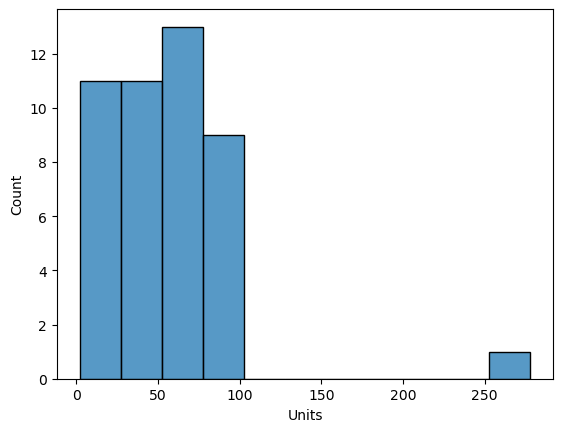

In [13]:
sns.histplot(x='Units', data=df3, )
plt.show()

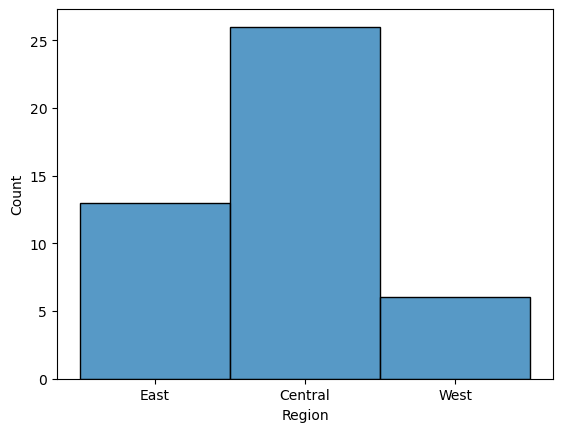

In [14]:
sns.histplot(x='Region', data=df3, )
plt.show()

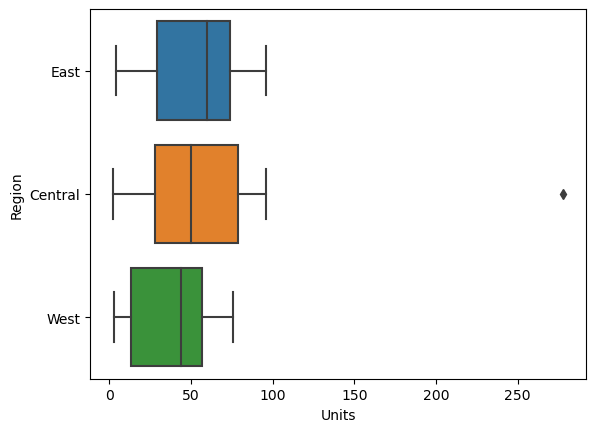

In [15]:
sns.boxplot( x="Units", y= "Region", data=df3, )
plt.show()

In [17]:
#Calulating average for sales column
sales_avg = df3['Sale_amt'].mean()
print("Average of Sale amt = ",sales_avg)

Average of total sales =  30578.76111111111
